<a href="https://colab.research.google.com/github/ananyaa-git/CODEQUEST/blob/main/EMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ENERGY MANAGEMENT SYSTEM**

Statement 6. Energy Management System for Electric Vehicles (EVs)
Description: Design and develop an Energy Management System for Electric
Vehicles (EVs) aimed at optimizing energy consumption and improving
vehicle efficiency. The system should monitor and evaluate various
parameters such as battery health, energy consumption patterns, regenerative
braking efficiency, and overall vehicle performance in real-time. The software
solution must include a user-friendly interface that provides drivers with key
insights into their energy usage through graphical performance evaluations,
including energy savings, range estimations, and power usage breakdowns.
Additionally, the system should offer suggestions for energy optimization,
such as ideal driving habits, routes, and charging cycles. The challenge is to
integrate real-time data analytics and intelligent algorithms to help EV users
make informed decisions, ensuring a balance between performance and
energy conservation. This solution will support the sustainability goals of the
EV sector by enhancing both user experience and energy efficiency.

In [2]:
#Importing the Libraries and data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Import the CSV file
ev = pd.read_csv('ElectricCarData_Clean.csv')
ev.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [5]:
ev.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [6]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [7]:
ev.shape
ev.isnull().sum()

,0
Brand,0
Model,0
AccelSec,0
TopSpeed_KmH,0
Range_Km,0
Efficiency_WhKm,0
FastCharge_KmH,0
RapidCharge,0
PowerTrain,0
PlugType,0


In [8]:
ev.dtypes

,0
Brand,object
Model,object
AccelSec,float64
TopSpeed_KmH,int64
Range_Km,int64
Efficiency_WhKm,int64
FastCharge_KmH,object
RapidCharge,object
PowerTrain,object
PlugType,object


In [9]:
ev.nunique()

,0
Brand,33
Model,102
AccelSec,55
TopSpeed_KmH,25
Range_Km,50
Efficiency_WhKm,54
FastCharge_KmH,51
RapidCharge,2
PowerTrain,3
PlugType,4


In [10]:
ev.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


<ipython-input-11-b488a4616ea4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand',y='Range_Km',data=ev,palette='hls')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32

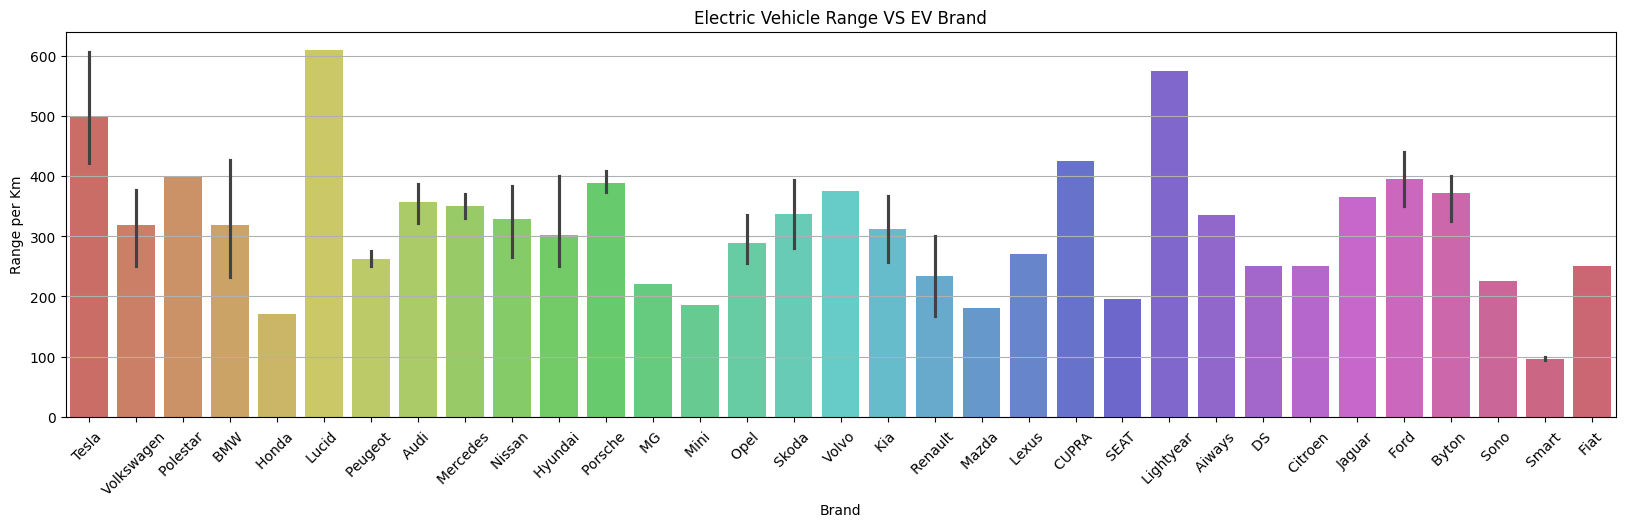

In [11]:
#Analysis range by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=ev,palette='hls')
plt.grid(axis='y')
plt.title('Electric Vehicle Range VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('Range per Km')
plt.xticks(rotation=45)

In [12]:
# model with highest range
range_df = ev.sort_values(by=['Range_Km'], ascending=False)
range_df[['Brand','Model','Range_Km']].head(n=1)

,Brand,Model,Range_Km
51,Tesla,Roadster,970


<ipython-input-13-7700600874d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand',y='AccelSec',data=ev,palette='coolwarm')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32

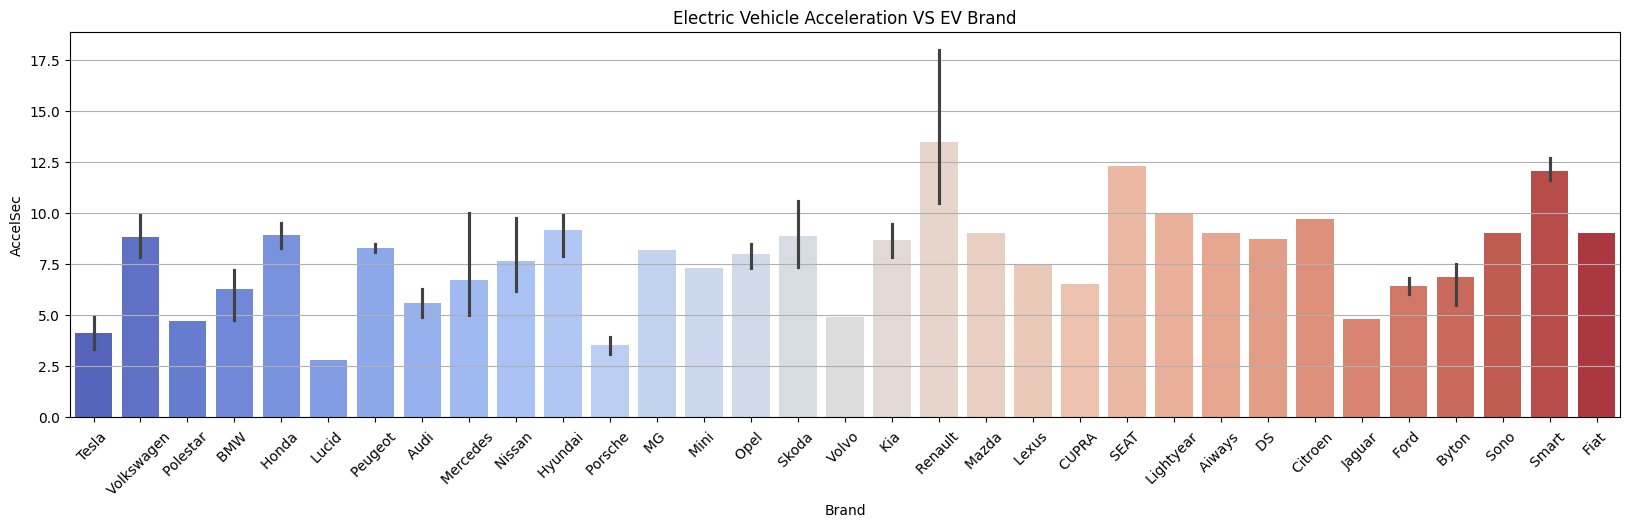

In [13]:
#Analysis acceleration by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='AccelSec',data=ev,palette='coolwarm')
plt.grid(axis='y')
plt.title('Electric Vehicle Acceleration VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('AccelSec')
plt.xticks(rotation=45)

In [14]:
df = ev.sort_values(by=['AccelSec'], ascending=True)
df[['Brand','Model','AccelSec']].head(n=1)

,Brand,Model,AccelSec
51,Tesla,Roadster,2.1


<ipython-input-15-f88b2d15bf90>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand',y='TopSpeed_KmH',data=ev,palette='husl')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32

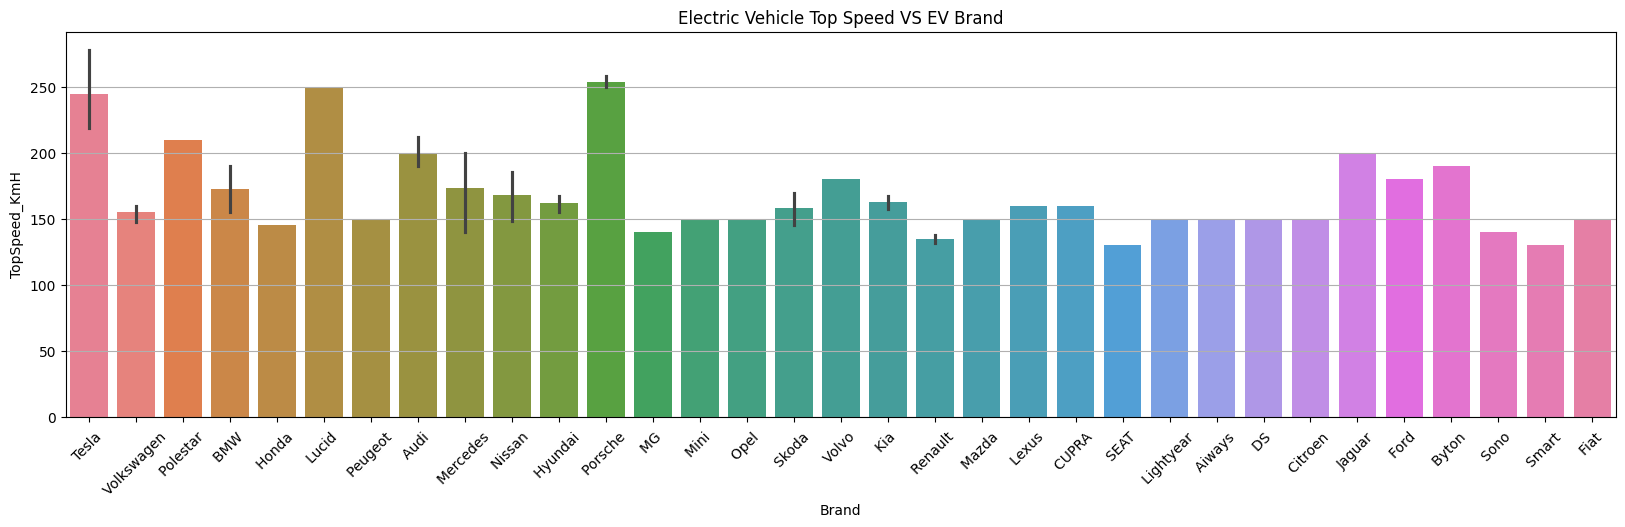

In [15]:
#Analysis top speed by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=ev,palette='husl')
plt.grid(axis='y')
plt.title('Electric Vehicle Top Speed VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('TopSpeed_KmH')
plt.xticks(rotation=45)

In [16]:
speed_df = ev.sort_values(by=['TopSpeed_KmH'], ascending=False)
speed_df[['Brand','Model','TopSpeed_KmH']].head(n=1)

,Brand,Model,TopSpeed_KmH
51,Tesla,Roadster,410


<ipython-input-17-01b9cd9fa611>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand',y='Efficiency_WhKm',data=ev,palette='Paired')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32

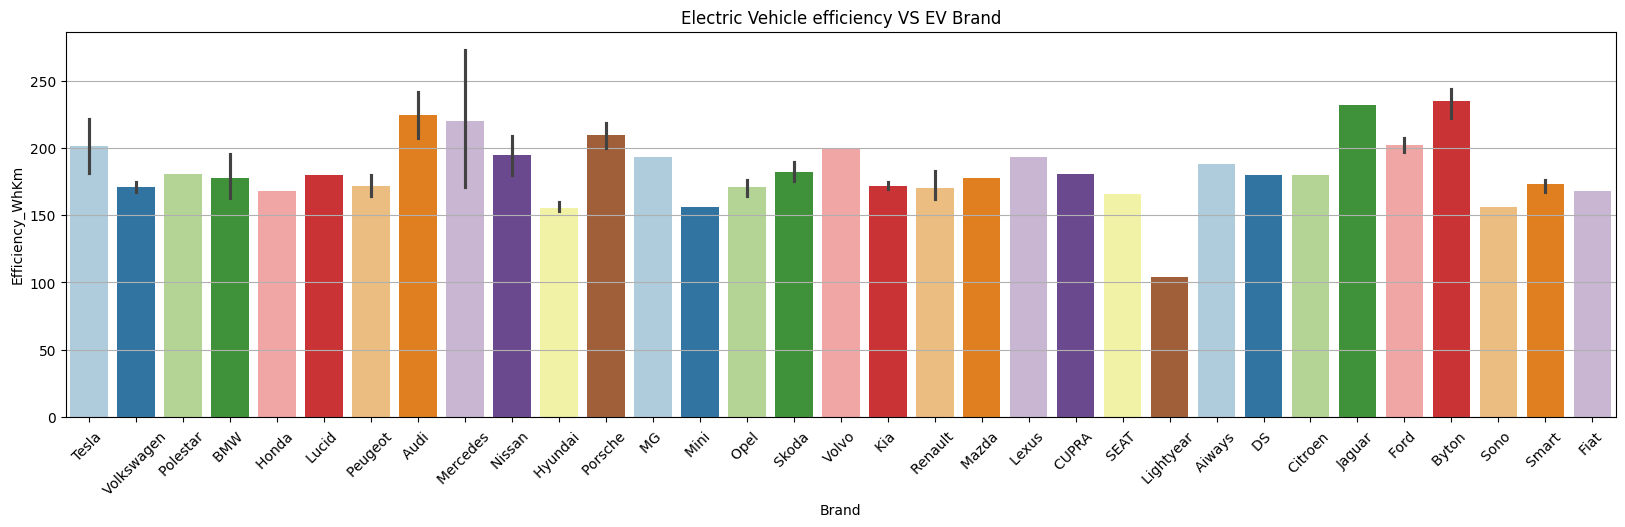

In [17]:
#Analysis efficiency by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=ev,palette='Paired')
plt.grid(axis='y')
plt.title('Electric Vehicle efficiency VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency_WhKm')
plt.xticks(rotation=45)

In [18]:
eff_df = ev.sort_values(by=['Efficiency_WhKm'], ascending=False)
eff_df[['Brand','Model','Efficiency_WhKm']].head(n=1)

,Brand,Model,Efficiency_WhKm
84,Mercedes,EQV 300 Long,273


In [19]:
seat_df = ev.sort_values(by=['Seats'], ascending=False)
seat_df[['Brand','Model','Range_Km', 'Seats']].head(n=1)

,Brand,Model,Range_Km,Seats
21,Tesla,Model Y Long Range Dual Motor,425,7


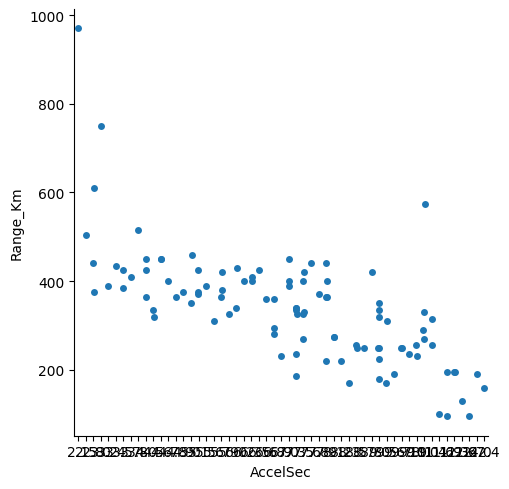

In [20]:
##Distribution of range with PowerTrain
fig, axs = plt.subplots(1,2)
sns.catplot(x="AccelSec", y="Range_Km", data=ev)
plt.close(1)

In [21]:
ev.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [22]:
ev1 = ev[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]

In [23]:
print(ev1)

encoder = OrdinalEncoder()

result = encoder.fit_transform(ev1)
print(result)

           Brand                            Model PowerTrain RapidCharge  \
0         Tesla     Model 3 Long Range Dual Motor        AWD         Yes   
1    Volkswagen                         ID.3 Pure        RWD         Yes   
2      Polestar                                 2        AWD         Yes   
3           BMW                              iX3         RWD         Yes   
4         Honda                                e         RWD         Yes   
..           ...                              ...        ...         ...   
98       Nissan                       Ariya 63kWh        FWD         Yes   
99         Audi     e-tron S Sportback 55 quattro        AWD         Yes   
100      Nissan               Ariya e-4ORCE 63kWh        AWD         Yes   
101      Nissan   Ariya e-4ORCE 87kWh Performance        AWD         Yes   
102       Byton                 M-Byte 95 kWh 2WD        AWD         Yes   

       PlugType  BodyStyle Segment  
0    Type 2 CCS      Sedan       D  
1    Type 2 C

In [24]:
temp = ['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']

In [25]:
ev.drop(temp,axis=1,inplace=True)
result = pd.DataFrame(result)

In [26]:
result.columns=["Brand", "Model", "PowerTrain", 'RapidCharge', "PlugType", "BodyStyle", "Segment"]
result.index+=1
result

,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
1,30.0,46.0,0.0,1.0,2.0,7.0,3.0
2,31.0,33.0,2.0,1.0,2.0,1.0,2.0
3,23.0,0.0,0.0,1.0,2.0,2.0,3.0
4,2.0,101.0,2.0,1.0,2.0,6.0,3.0
5,9.0,78.0,2.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...
99,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,1.0,94.0,0.0,1.0,2.0,6.0,4.0
101,20.0,8.0,0.0,1.0,2.0,1.0,2.0
102,20.0,10.0,0.0,1.0,2.0,1.0,2.0


In [27]:
ev1 = ev
ev1.index+=1
ev1[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']] = result[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]
ev

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
1,4.6,233,450,161,940,5,55480,30.0,46.0,0.0,1.0,2.0,7.0,3.0
2,10.0,160,270,167,250,5,30000,31.0,33.0,2.0,1.0,2.0,1.0,2.0
3,4.7,210,400,181,620,5,56440,23.0,0.0,0.0,1.0,2.0,2.0,3.0
4,6.8,180,360,206,560,5,68040,2.0,101.0,2.0,1.0,2.0,6.0,3.0
5,9.5,145,170,168,190,4,32997,9.0,78.0,2.0,1.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7.5,160,330,191,440,5,45000,20.0,6.0,1.0,1.0,2.0,1.0,2.0
100,4.5,210,335,258,540,5,96050,1.0,94.0,0.0,1.0,2.0,6.0,4.0
101,5.9,200,325,194,440,5,50000,20.0,8.0,0.0,1.0,2.0,1.0,2.0
102,5.1,200,375,232,450,5,65000,20.0,10.0,0.0,1.0,2.0,1.0,2.0


In [28]:
import numpy as np

features = ['TopSpeed_KmH', 'AccelSec', 'Efficiency_WhKm', 'FastCharge_KmH', 'PowerTrain', 'BodyStyle', 'RapidCharge'  ]

for column in features:
    ev = ev[ev[column] != '-']

X = ev[['TopSpeed_KmH', 'AccelSec', 'Efficiency_WhKm', 'FastCharge_KmH', 'PowerTrain', 'BodyStyle', 'RapidCharge']].values
y = ev['Range_Km']

In [29]:
#Training and Test Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)


print("y_test : ",y_test.shape)

X_train :  (78, 7)
X_test :  (20, 7)
y_train :  (78,)
y_test :  (20,)


In [30]:
# Create Linear Model
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test)
y_pred[0:5]

array([343.96135802, 478.28396575, 418.98065068, 237.02818471,
       302.58953114])

In [36]:
import joblib

joblib.dump(lr, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [37]:
loaded_lr_model = joblib.load('linear_regression_model.pkl')

In [43]:


# Load the model
lr_model = joblib.load('linear_regression_model.pkl')

# Define the features for prediction
top_speed = 160
acceleration = 15.0
efficiency = 100
fast_charge = 250

# Assuming you need 7 features, fill the missing ones (replace 0 with the appropriate values)
real_time_features = np.array([[top_speed, acceleration, efficiency, fast_charge, 0, 0, 0]])

# Predict the range
predicted_range = lr_model.predict(real_time_features)
print(predicted_range)



[296.5702089]


In [45]:
total_capacity_kwh = float(input("Enter the total capacity of the battery pack in kilowatt-hours (KWh): "))
efficiency_wh_km =222
consumed_energy = efficiency_wh_km * predicted_range / 1000  # Convert to KWh

# Calculate SoC
current_soc = 100 - (consumed_energy / total_capacity_kwh) * 100
print(f"Estimated State of Charge (SoC): {current_soc[0]:.2f}%")


Enter the total capacity of the battery pack in kilowatt-hours (KWh): 222
Estimated State of Charge (SoC): 70.34%


In [46]:
def charging_discharging_decision(predicted_range, current_soc, min_soc_threshold, max_soc_threshold):
    """
    Make a decision whether to charge, discharge, or maintain the current state based on predicted range and current SoC.
    """
    if current_soc < min_soc_threshold:
        decision = 'discharge'
    elif current_soc > max_soc_threshold:
        decision = 'charge'
    else:
        decision = 'maintain'
    return decision

predicted_range
current_soc
min_soc_threshold = 20
max_soc_threshold = 80

decision = charging_discharging_decision(predicted_range, current_soc, min_soc_threshold, max_soc_threshold)
print("Charging/Discharging Decision:", decision)

Charging/Discharging Decision: maintain


In [49]:
import numpy as np

def regenerative_braking(current_speed, deceleration_rate, efficiency_wh_km):
    recovered_energy = 0.5 * (current_speed ** 2) / deceleration_rate * efficiency_wh_km / 1000  # Convert to KWh
    return recovered_energy

lr = joblib.load('linear_regression_model.pkl')

top_speed = 170
acceleration = 20
efficiency = 150
fast_charge = 270

features = np.array([[top_speed, acceleration, efficiency, fast_charge,0,0,0]])

predicted_range = lr.predict(features)

print("Predicted Range (Km):", predicted_range[0])

total_capacity_kwh = float(input("Enter the total capacity of the battery pack in kilowatt-hours (KWh): "))
efficiency_wh_km
consumed_energy = efficiency_wh_km * predicted_range / 1000  # Convert to KWh

# Calculate SoC
current_soc = 100 - (consumed_energy / total_capacity_kwh) * 100
print(f"Estimated State of Charge (SoC): {current_soc[0]:.2f}%")

# Example values for regenerative braking
current_speed = 40
deceleration_rate = 2

recovered_energy = regenerative_braking(current_speed, deceleration_rate, efficiency_wh_km)
print(f"Recovered Energy from Regenerative Breaking: {recovered_energy:.2f} KWh")

current_soc += 100 - (recovered_energy / total_capacity_kwh) * 100

print(f"Estimated State of Charge (SoC) after regenerative breaking: {current_soc[0]:.2f}%")

max_soc_threshold = 80
if current_soc > max_soc_threshold:
    current_soc = max_soc_threshold

min_soc_threshold = 20
if current_soc < min_soc_threshold:
    current_soc = min_soc_threshold

adjusted_decision = charging_discharging_decision(predicted_range, current_soc, min_soc_threshold, max_soc_threshold)
print("Charging/Discharging Decision after Regenerative Breaking:", adjusted_decision)

Predicted Range (Km): 349.2638057364277
Enter the total capacity of the battery pack in kilowatt-hours (KWh): 333
Estimated State of Charge (SoC): 76.72%
Recovered Energy from Regenerative Breaking: 88.80 KWh
Estimated State of Charge (SoC) after regenerative breaking: 150.05%
Charging/Discharging Decision after Regenerative Breaking: maintain


In [50]:
# Get the coefficients
coefficients = lr.coef_

# Print the coefficients for each feature
for feature, coefficient in zip(features, coefficients):
    print(f"{feature}: {coefficient}")

[170  20 150 270   0   0   0]: 1.2976783506102156


In [51]:
lr.coef_

array([ 1.29767835,  2.96014715,  0.39289076,  0.26357697, -2.72807539,
       -8.31766532,  0.        ])

In [52]:
lr.intercept_

-60.643852707215956

In [53]:
# Assuming X_train and Y_train are your training data
from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Get the coefficients
coefficients = reg.coef_
#'TopSpeed_KmH', 'AccelSec', 'Efficiency_WhKm', 'FastCharge_KmH', 'PowerTrain', 'BodyStyle', 'RapidCharge'

# Print the coefficients
print("Coefficients:", coefficients[0], coefficients[1], coefficients[2], coefficients[3], coefficients[4],coefficients[5], coefficients[6])

Coefficients: 1.2976783506102156 2.960147150862552 0.3928907647129345 0.2635769670952435 -2.728075389734111 -8.317665324630662 0.0


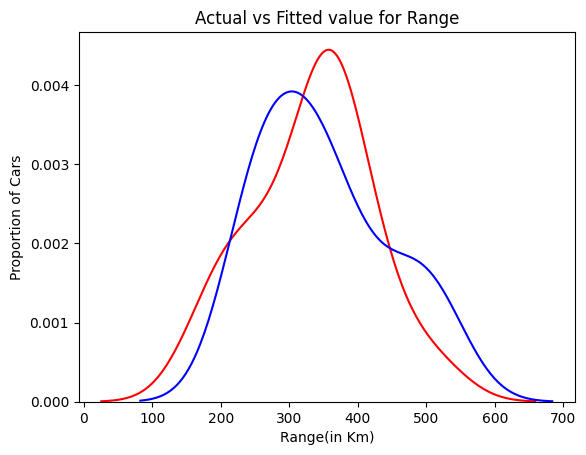

In [54]:
ax1 = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values", ax=ax1)
plt.title('Actual vs Fitted value for Range')
plt.xlabel('Range(in Km)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

In [55]:
#Model Evaluation (Regression Metrics)
# Calculate the score for Training Data
lr.score(X_train, y_train)
print("R2 for Traing Data: ", lr.score(X_train, y_train))

R2 for Traing Data:  0.6086138444169638


In [56]:
# Calculate the score (R^2 for Regression) for Testing Data
lr.score(X_test, y_test)
print("R2 for Testing Data: ", lr.score(X_test, y_test))

R2 for Testing Data:  0.45304400314294024


In [57]:
#Calculate Mean Squared Error
mean_squared_error(y_test, y_pred)
print("MSE: ", mean_squared_error(y_test, y_pred))

MSE:  3974.182273163396


In [58]:
#Calculate Mean Absolute Error(MAE)
mean_absolute_error(y_test, y_pred)
print("MAE: ",mean_absolute_error(y_test, y_pred))

MAE:  52.14128215103007


In [59]:
#Calculate Root Mean Squared Error(RMSE)

print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  63.041115735394435
